<a href="https://colab.research.google.com/github/SurekhaBerlin/WorldHappinessReport/blob/main/world_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## STEP 2 : Data Aquisition

In [2]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3= pd.read_csv('2017.csv')
df4= pd.read_csv('2018.csv')
df5= pd.read_csv('2019.csv')

In [3]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df2.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
df3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
df4.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
df5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

## STEP 3: Data Preparation

In [9]:
# Create a dictionary for column renaming
column_mapping = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Whisker.high': 'Upper Confidence Interval',
    'Whisker.low': 'Lower Confidence Interval',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Overall rank': 'Happiness Rank'
}


In [10]:
# Apply the renaming to each dataframe
df1.rename(columns=column_mapping, inplace=True)
df2.rename(columns=column_mapping, inplace=True)
df3.rename(columns=column_mapping, inplace=True)
df4.rename(columns=column_mapping, inplace=True)
df5.rename(columns=column_mapping, inplace=True)

In [11]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Lower Confidence Interval      312 non-null    flo

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval'],
      dtype='object')

In [14]:
columns_to_drop = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual','Standard Error','Region']
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [16]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Happiness Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
Economy (GDP per Capita),782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Health (Life Expectancy),782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075


## STEP 4 : Data Cleaning

In [18]:
df.shape

(782, 9)

In [19]:
df.isnull().sum()

,0
Country,0
Happiness Rank,0
Happiness Score,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),1
Generosity,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


## STEP 5 : Data Visualization

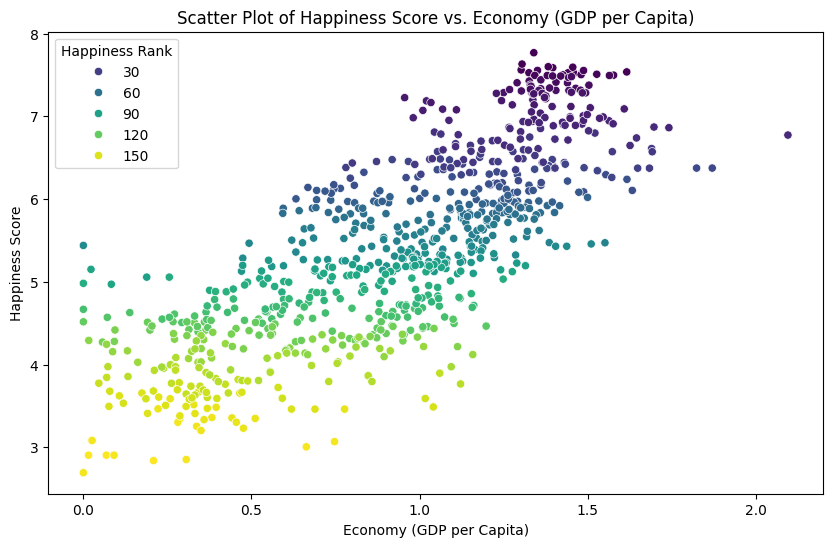

In [21]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df, hue='Happiness Rank', palette='viridis')

# Add titles and labels
plt.title('Scatter Plot of Happiness Score vs. Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

# Show the plot
plt.show()

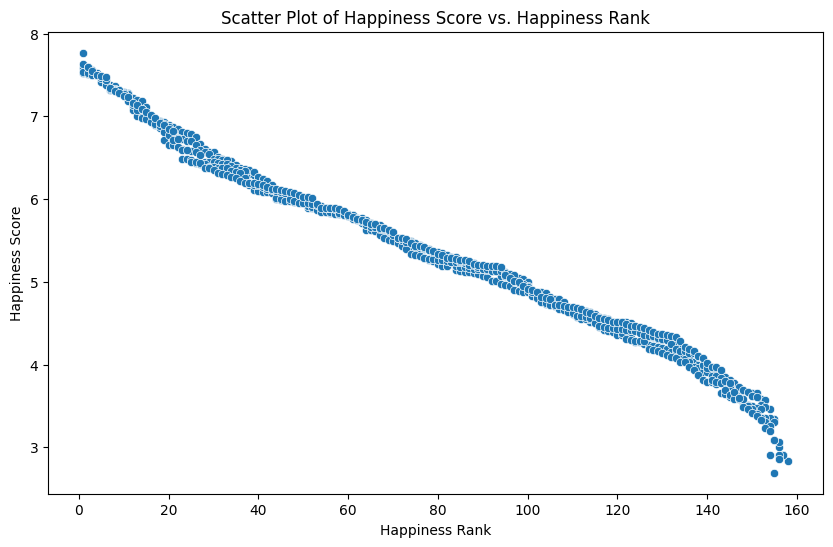

In [22]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness Rank', y='Happiness Score', data=df, palette='viridis')

# Add titles and labels
plt.title('Scatter Plot of Happiness Score vs. Happiness Rank')
plt.xlabel('Happiness Rank')
plt.ylabel('Happiness Score')

# Show the plot
plt.show()

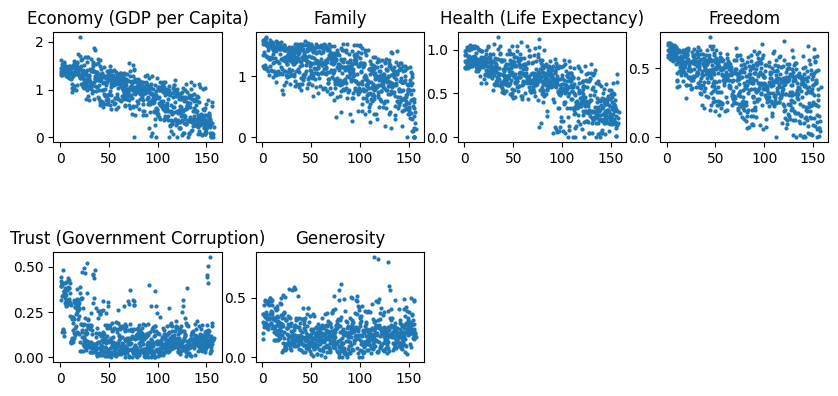

In [23]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df.columns[3:]):
    x = df["Happiness Rank"]
    y = df[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,cmap='viridis',s=4)

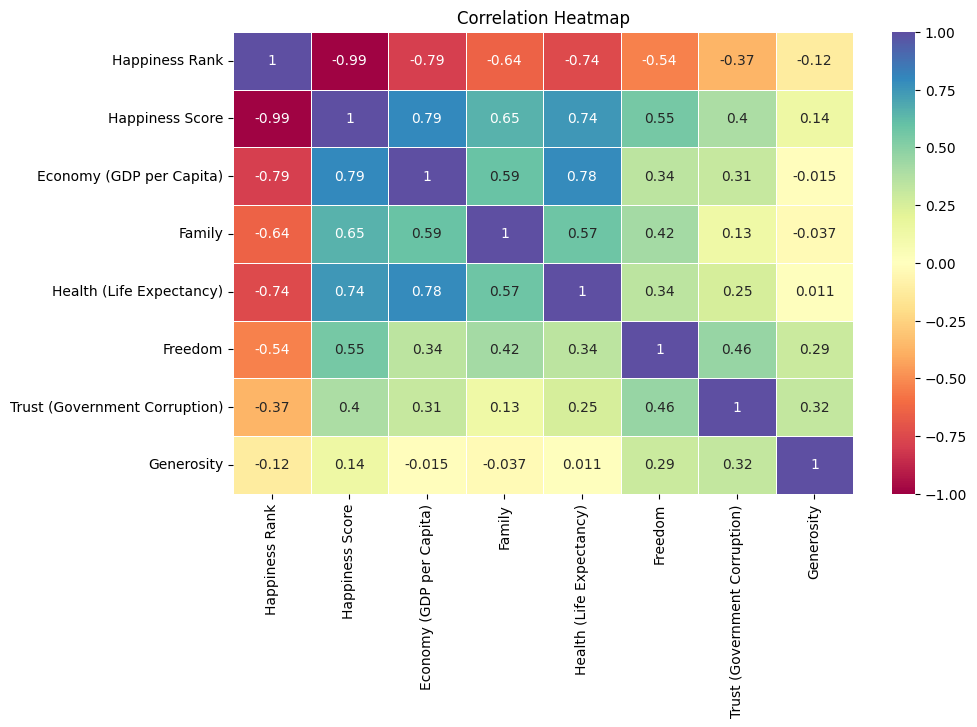

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', linewidths=0.5, vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


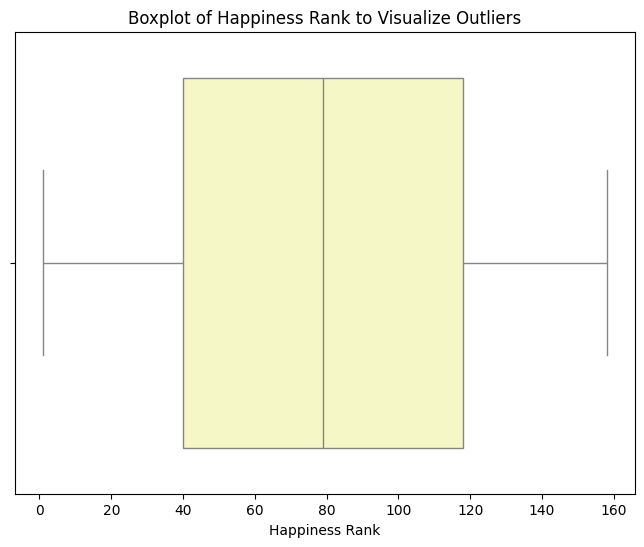

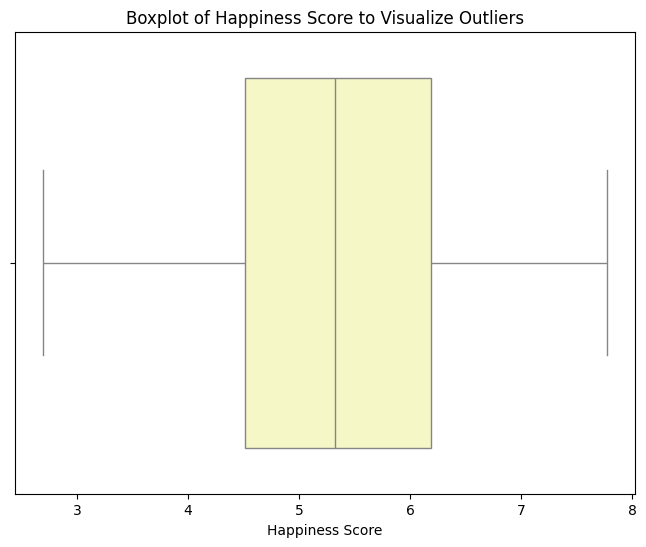

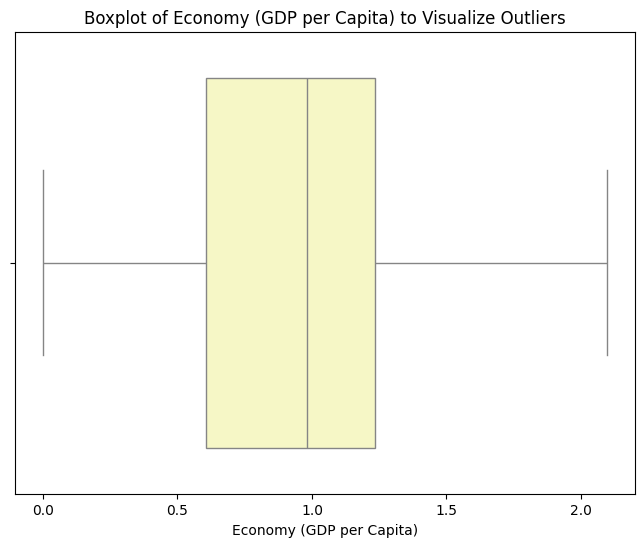

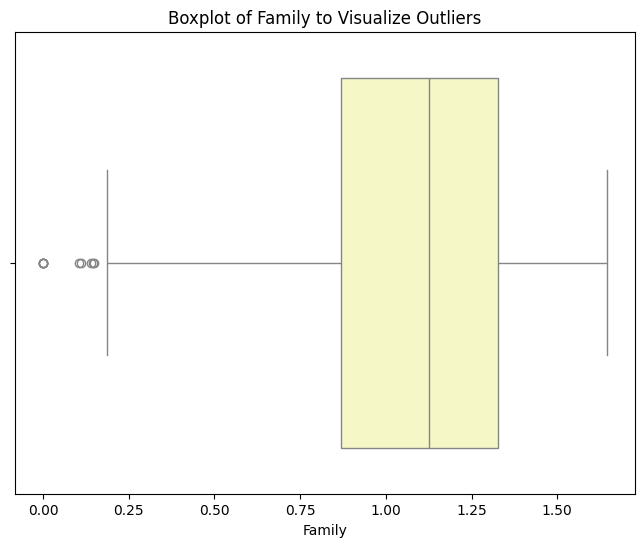

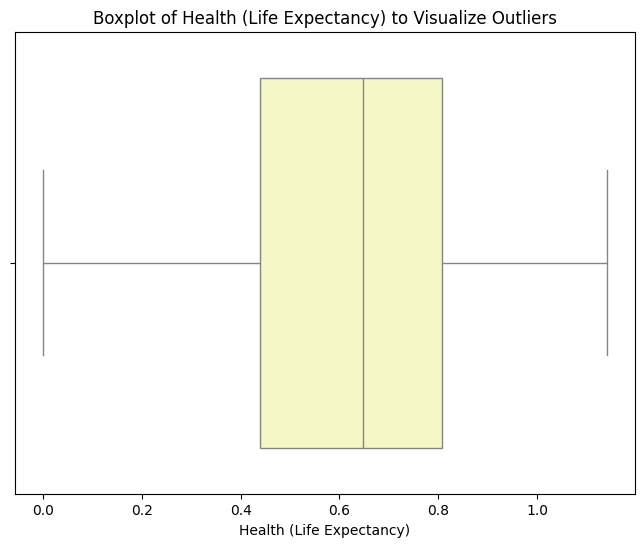

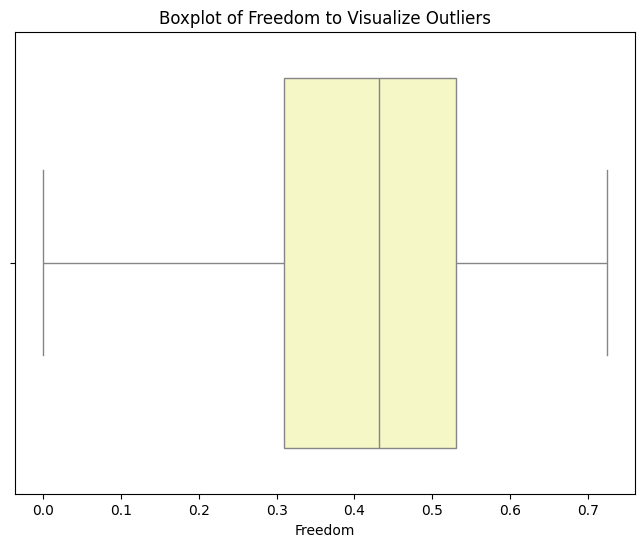

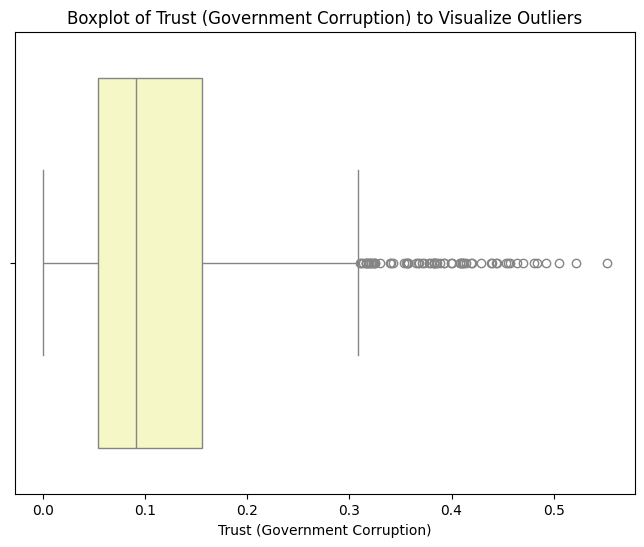

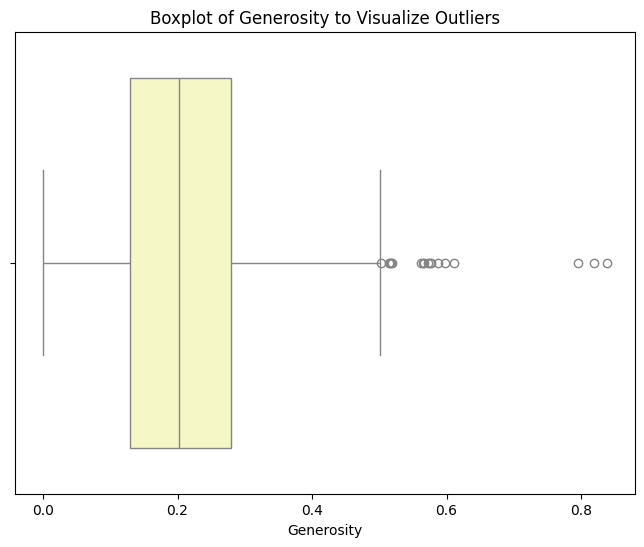

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create individual boxplots for each numeric column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size for each plot
    sns.boxplot(x=numeric_df[column], palette='RdYlGn')  # Boxplot for the column with viridis color
    plt.title(f'Boxplot of {column} to Visualize Outliers')
    plt.show()  # Show the plot for each column


In [26]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the Z-scores for each numeric column
z_scores = zscore(numeric_df)

# Define a threshold for outliers (e.g., abs(z) > 3)
threshold = 3

# Remove rows where any column has a z-score greater than the threshold
df_no_outliers_zscore = df[(abs(z_scores) < threshold).all(axis=1)]

# Show the DataFrame with outliers removed
print(df_no_outliers_zscore)


Empty DataFrame
Columns: [Country, Happiness Rank, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []


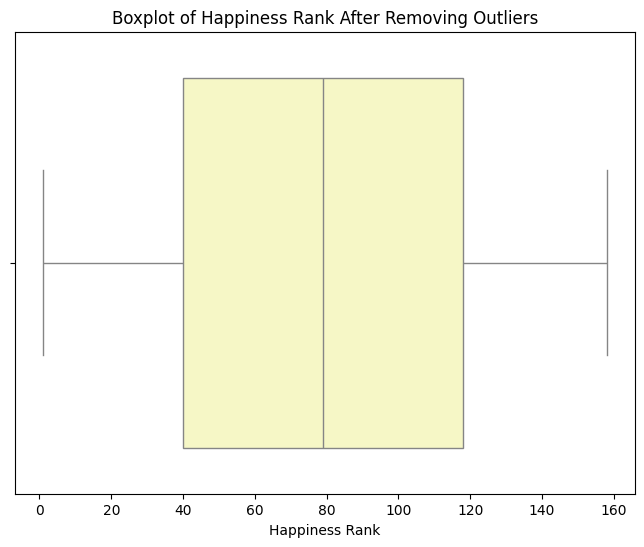

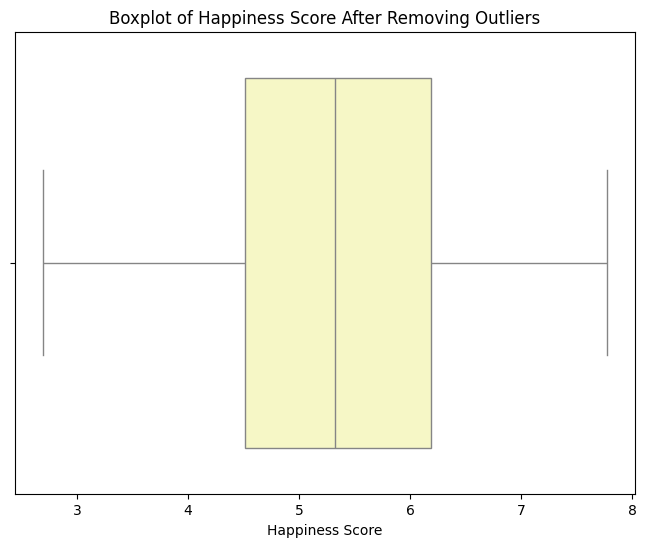

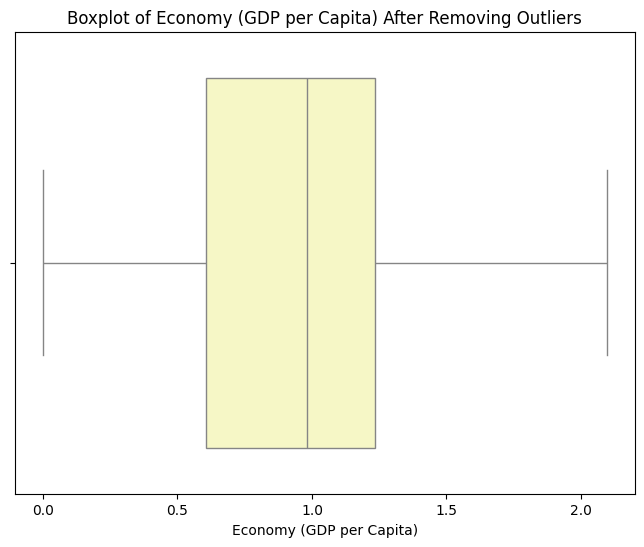

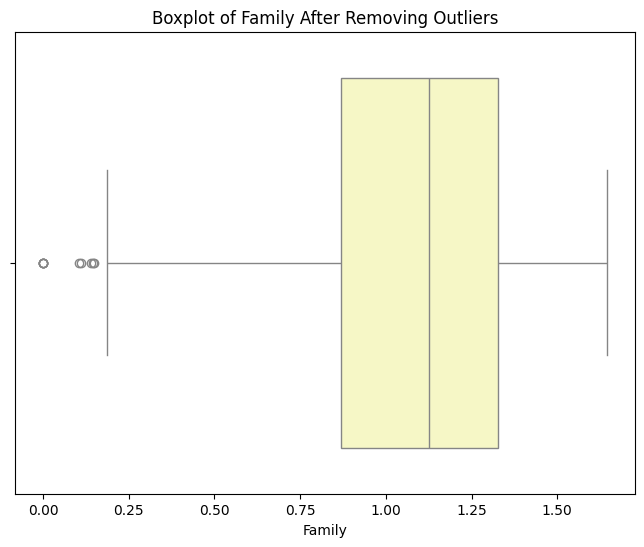

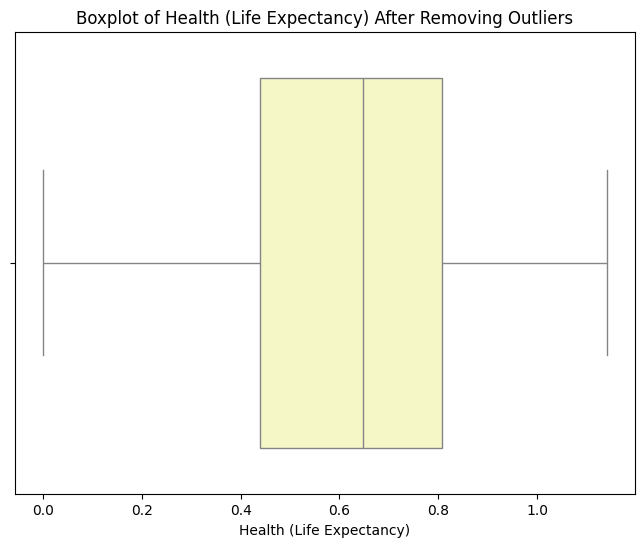

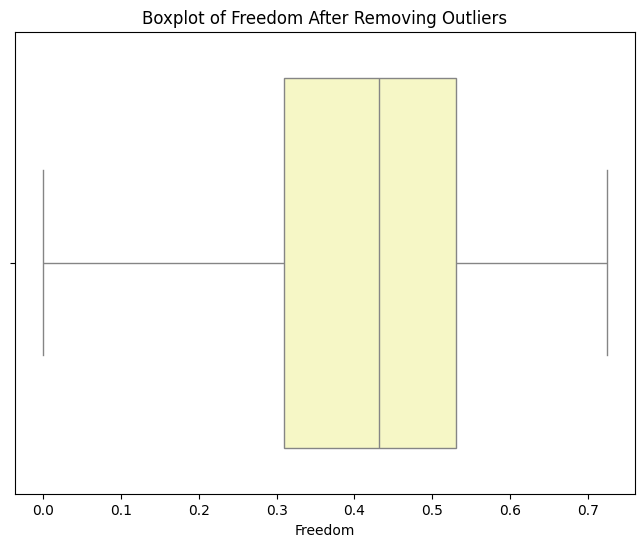

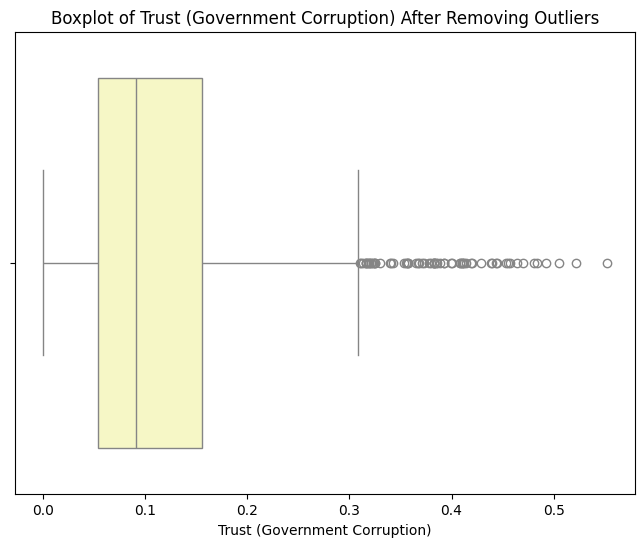

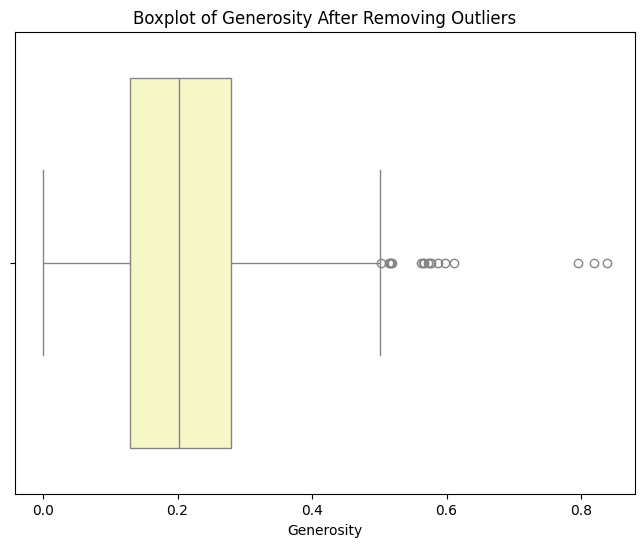

In [27]:

# Create individual boxplots for each numeric column with 'viridis' palette
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size for each plot
    sns.boxplot(x=numeric_df[column], palette='RdYlGn')  # Boxplot for the column with viridis color
    plt.title(f'Boxplot of {column} After Removing Outliers')
    plt.show()  # Show the plot for each column


In [28]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [29]:
df


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


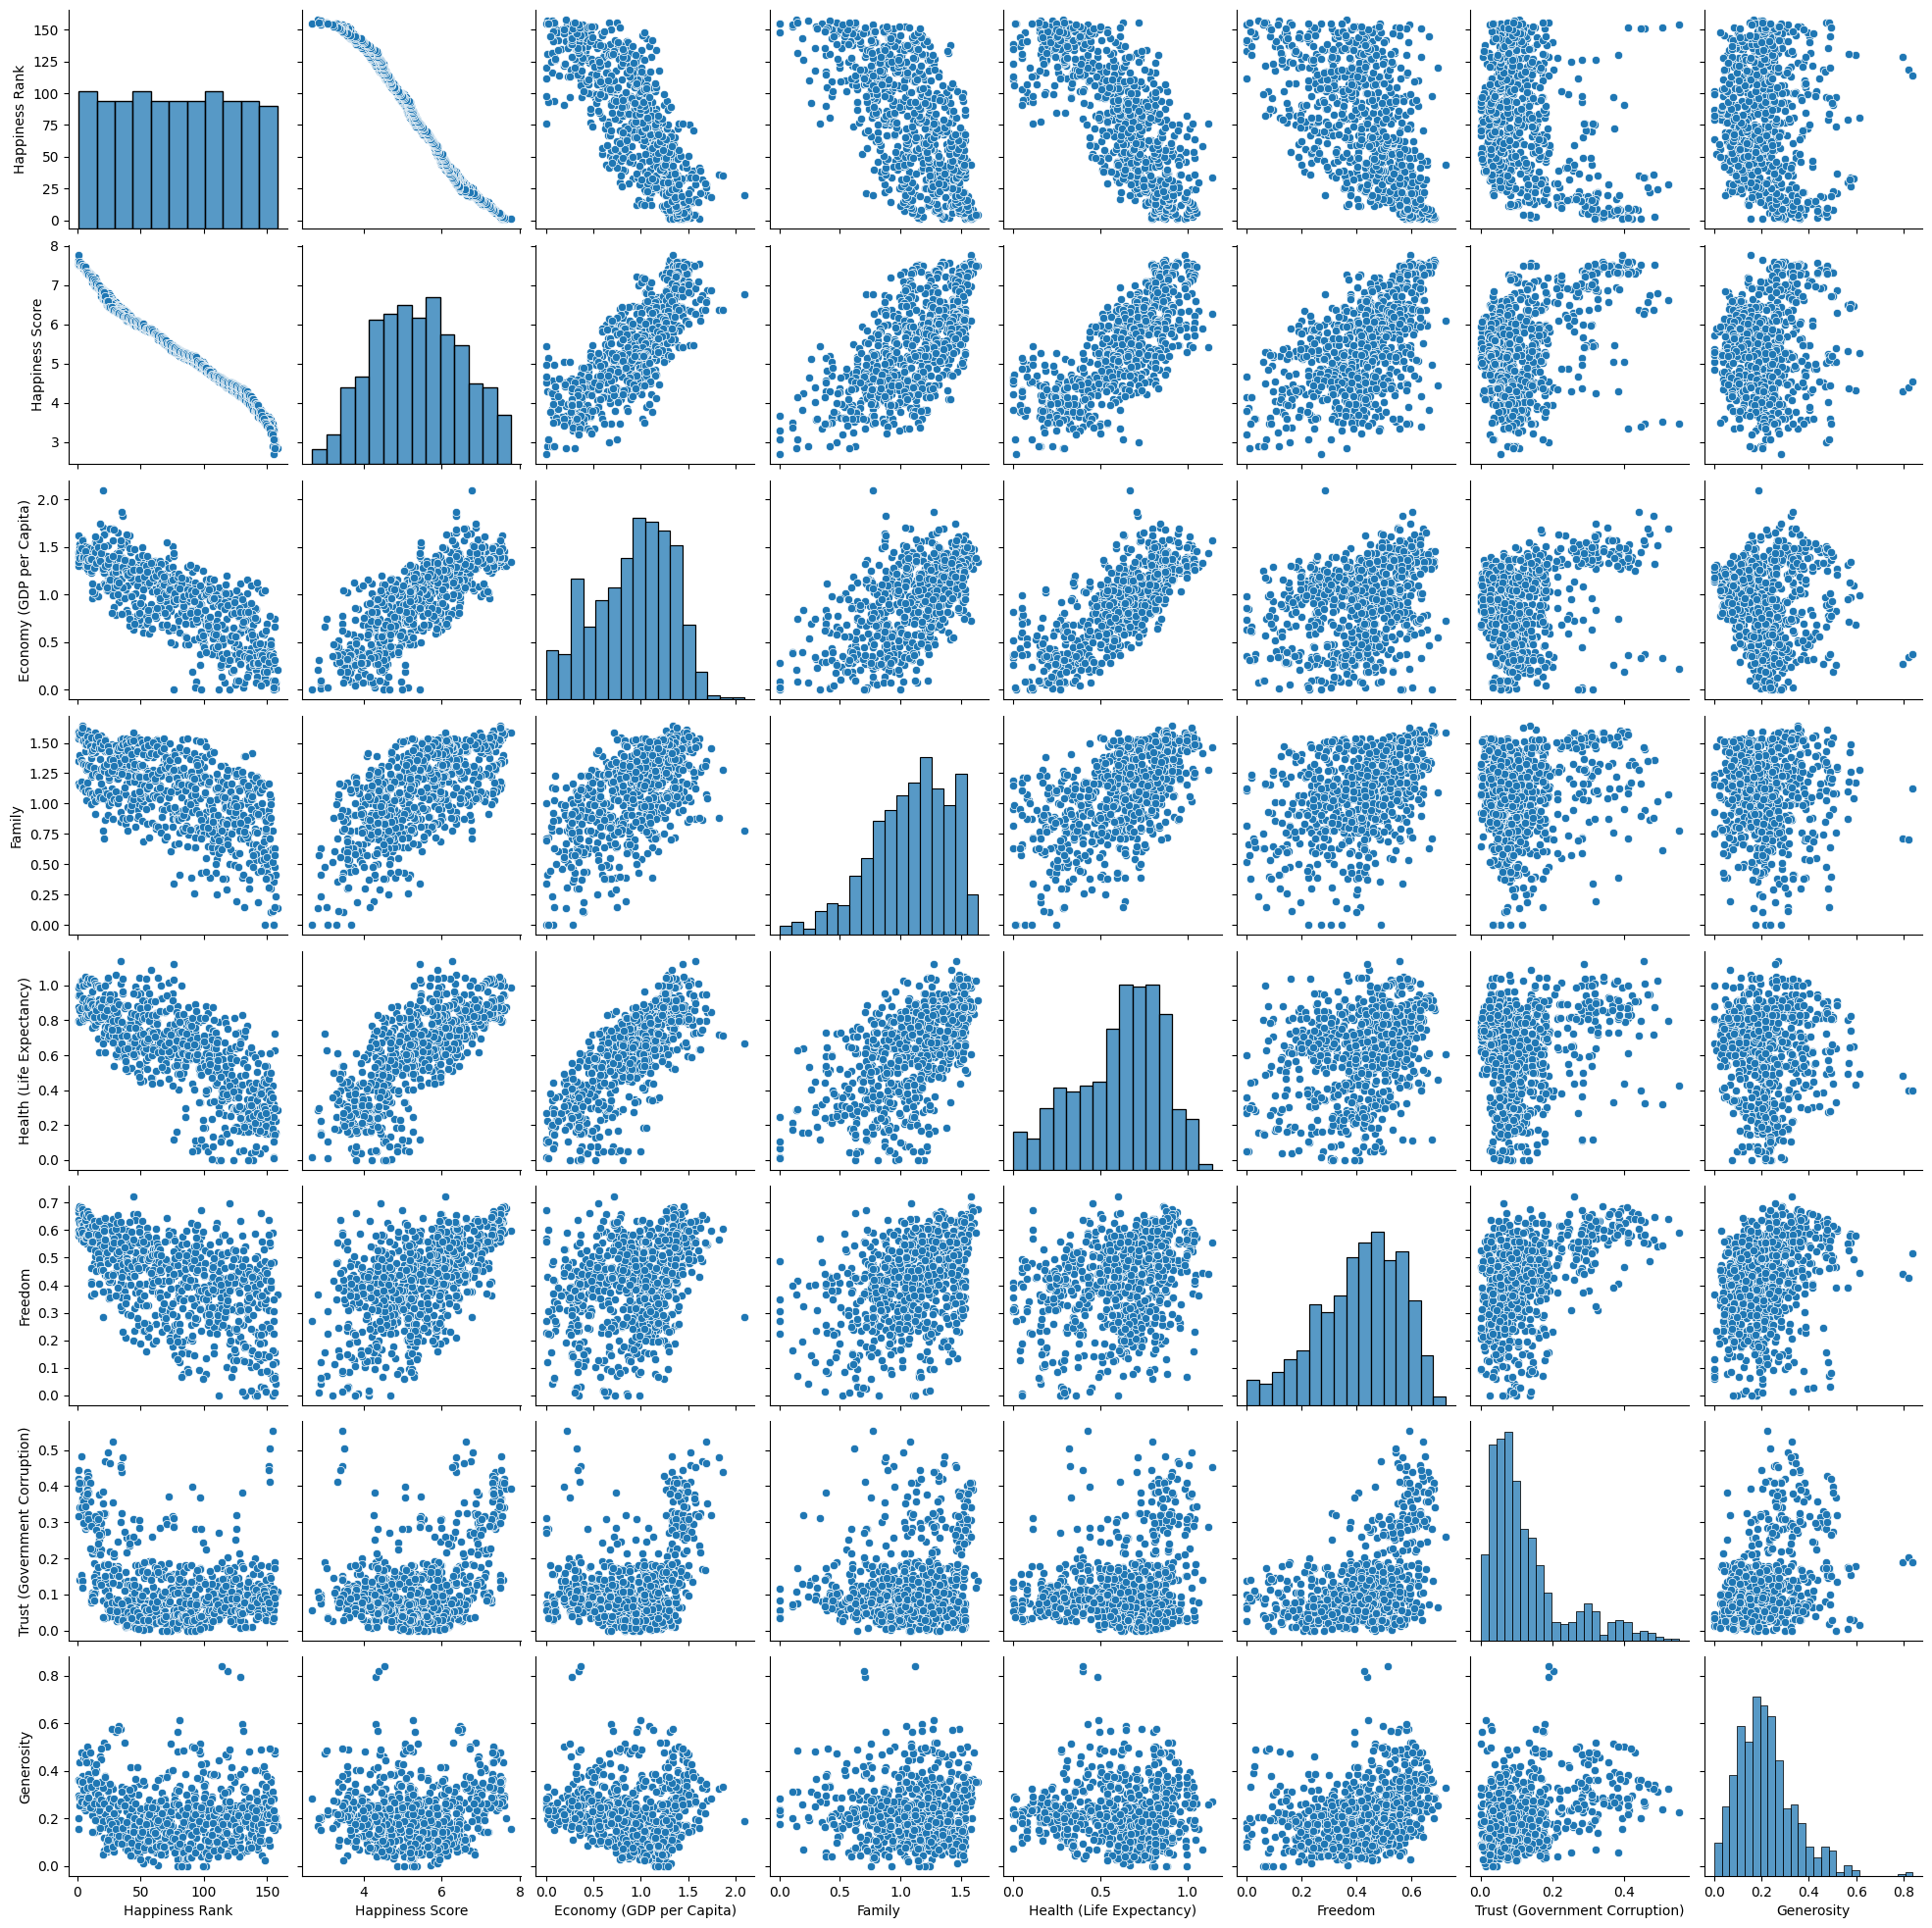

In [30]:
sns.pairplot(df)

In [31]:
# Get the top 10 countries by Economy (GDP per Capita)
top_10_gdp = df.nlargest(10, 'Economy (GDP per Capita)')

# Print the list with Country and Economy (GDP per Capita)
print(top_10_gdp[['Country', 'Economy (GDP per Capita)']])



                  Country  Economy (GDP per Capita)
489  United Arab Emirates                  2.096000
349                 Qatar                  1.870766
193                 Qatar                  1.824270
332            Luxembourg                  1.741944
177            Luxembourg                  1.697520
340             Singapore                  1.692278
27                  Qatar                  1.690420
654                 Qatar                  1.684000
501                 Qatar                  1.649000
179             Singapore                  1.645550


In [32]:
# Drop duplicates to get unique countries
df_unique_countries = df.drop_duplicates(subset='Country')

# Get the top 10 unique countries based on Economy (GDP per Capita)
top_10_gdp_unique = df_unique_countries.nlargest(10, 'Economy (GDP per Capita)')

# Print the list of unique countries and their GDP per capita
print(top_10_gdp_unique[['Country', 'Economy (GDP per Capita)']])


                      Country  Economy (GDP per Capita)
27                      Qatar                  1.690420
16                 Luxembourg                  1.563910
38                     Kuwait                  1.554220
385   Hong Kong S.A.R., China                  1.551675
23                  Singapore                  1.521860
3                      Norway                  1.459000
347  Taiwan Province of China                  1.433627
19       United Arab Emirates                  1.427270
0                 Switzerland                  1.396510
34               Saudi Arabia                  1.395410


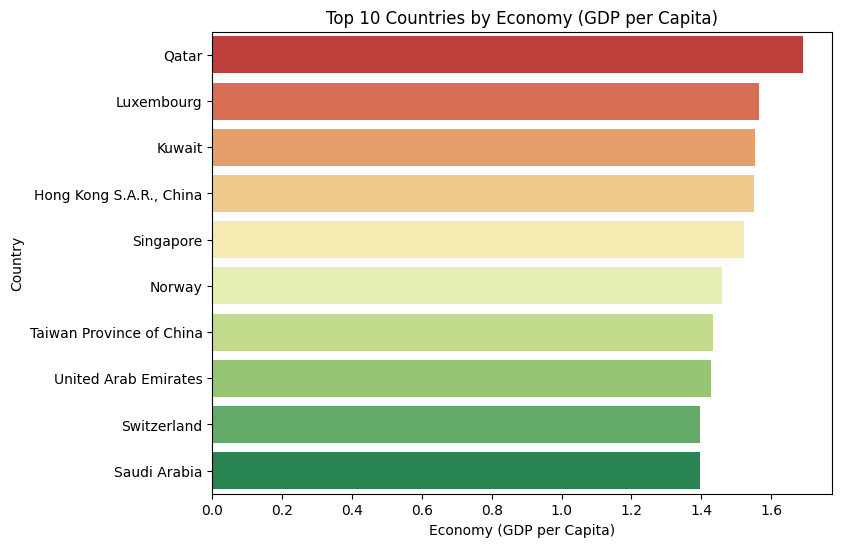

In [33]:
# Plot for Economy (GDP per Capita)
plt.figure(figsize=(8, 6))

# Drop duplicates to get unique countries
df_unique_countries = df.drop_duplicates(subset='Country')

# Get the top 10 unique countries based on 'Economy (GDP per Capita)'
top_10_gdp_unique = df_unique_countries.nlargest(10, 'Economy (GDP per Capita)')

# Plot the barplot
sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top_10_gdp_unique, palette="RdYlGn")

# Title of the plot
plt.title('Top 10 Countries by Economy (GDP per Capita)')

# Show the plot
plt.show()


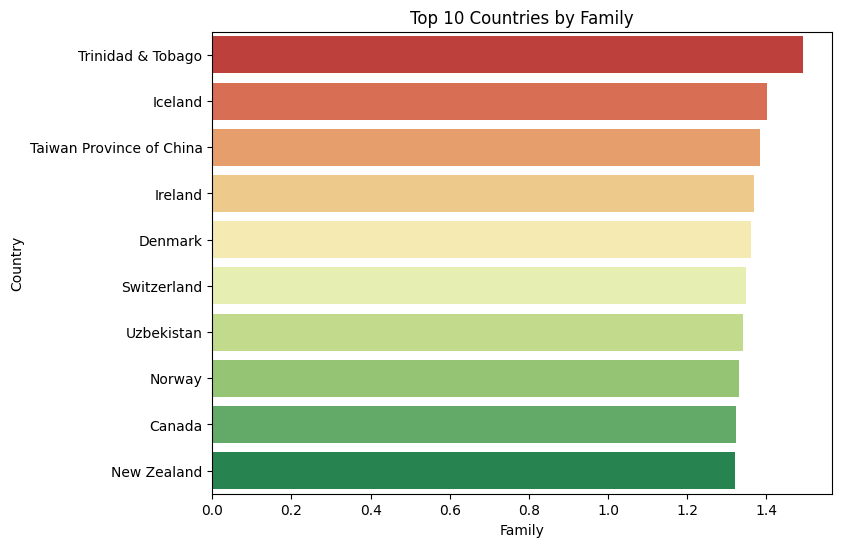

In [34]:
# Plot for Family
plt.figure(figsize=(8, 6))

# Drop duplicates to get unique countries
df_unique_countries_family = df.drop_duplicates(subset='Country')

# Get the top 10 unique countries based on 'Family'
top_10_family_unique = df_unique_countries_family.nlargest(10, 'Family')

# Plot the barplot
sns.barplot(x='Family', y='Country', data=top_10_family_unique, palette="RdYlGn")

# Title of the plot
plt.title('Top 10 Countries by Family')

# Show the plot
plt.show()


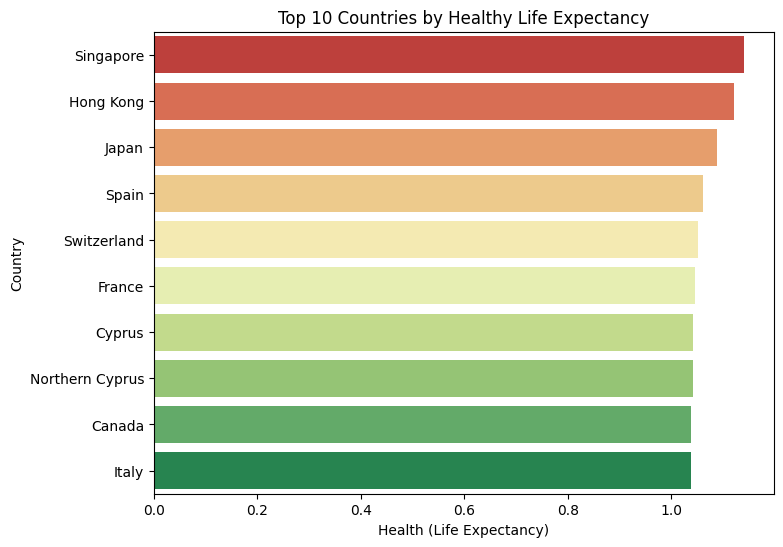

In [35]:

# Plot for Healthy Life Expectancy
plt.figure(figsize=(8, 6))
sns.barplot(x='Health (Life Expectancy)', y='Country', data=df.nlargest(10, 'Health (Life Expectancy)'), palette='RdYlGn')
plt.title('Top 10 Countries by Healthy Life Expectancy')
plt.show()


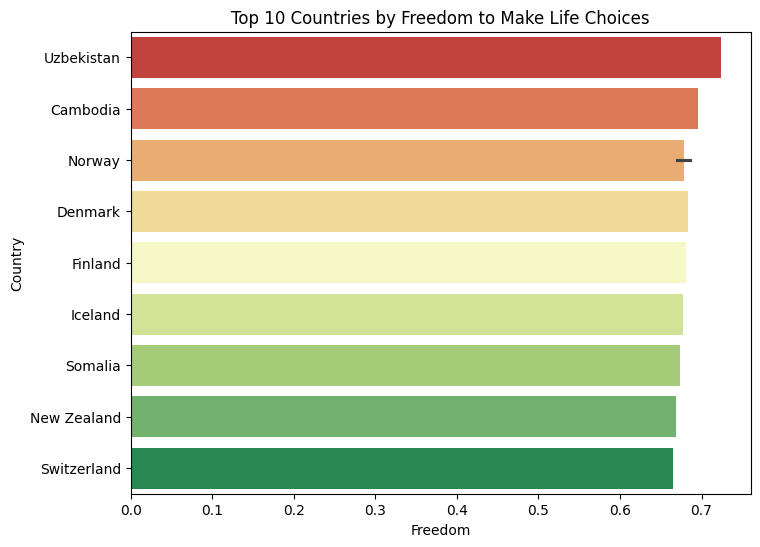

In [36]:

# Plot for Freedom to Make Life Choices
plt.figure(figsize=(8, 6))
sns.barplot(x='Freedom', y='Country', data=df.nlargest(10, 'Freedom'), palette='RdYlGn')
plt.title('Top 10 Countries by Freedom to Make Life Choices')
plt.show()


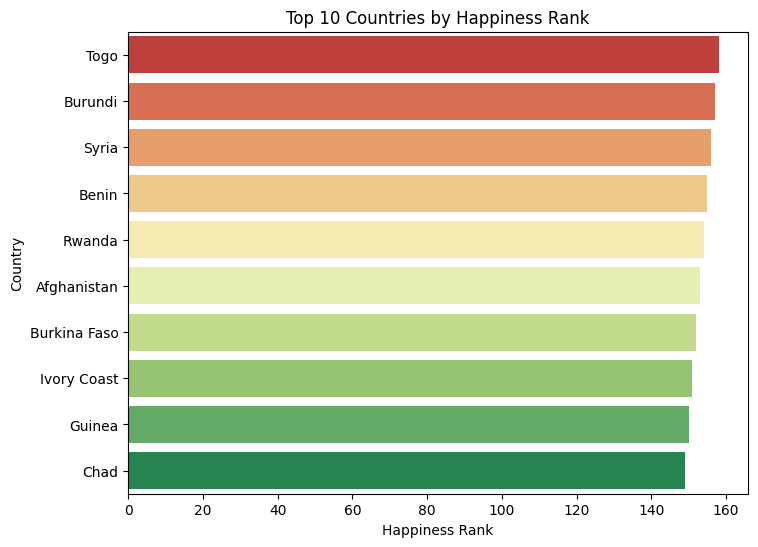

In [37]:
# Plot for Freedom to Make Life Choices (based on Happiness Rank)
plt.figure(figsize=(8, 6))

# Drop duplicates to get unique countries
df_unique_countries_happiness = df.drop_duplicates(subset='Country')

# Get the top 10 unique countries based on 'Happiness Rank'
top_10_happiness_unique = df_unique_countries_happiness.nlargest(10, 'Happiness Rank')

# Plot the barplot
sns.barplot(x='Happiness Rank', y='Country', data=top_10_happiness_unique, palette='RdYlGn')

# Title of the plot
plt.title('Top 10 Countries by Happiness Rank')

# Show the plot
plt.show()


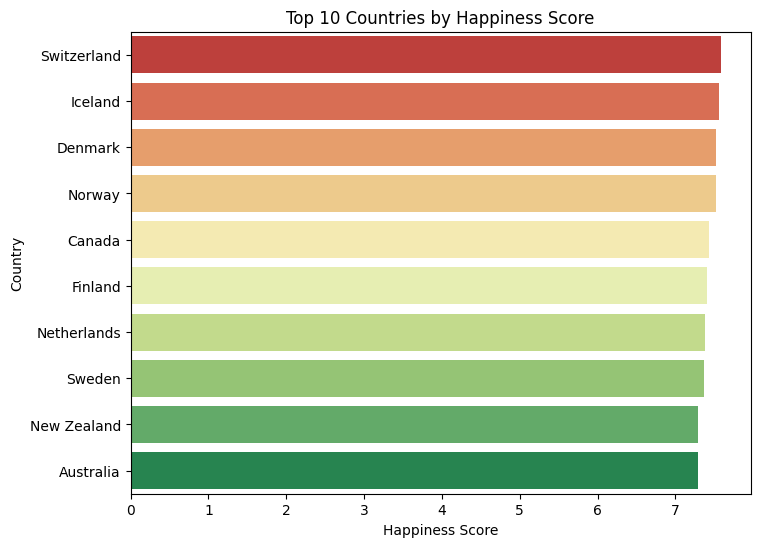

In [38]:
# Plot for Freedom to Make Life Choices (based on Happiness Score)
plt.figure(figsize=(8, 6))

# Drop duplicates to get unique countries
df_unique_countries_happiness_score = df.drop_duplicates(subset='Country')

# Get the top 10 unique countries based on 'Happiness Score'
top_10_happiness_score_unique = df_unique_countries_happiness_score.nlargest(10, 'Happiness Score')

# Plot the barplot
sns.barplot(x='Happiness Score', y='Country', data=top_10_happiness_score_unique, palette='RdYlGn')

# Title of the plot
plt.title('Top 10 Countries by Happiness Score')

# Show the plot
plt.show()


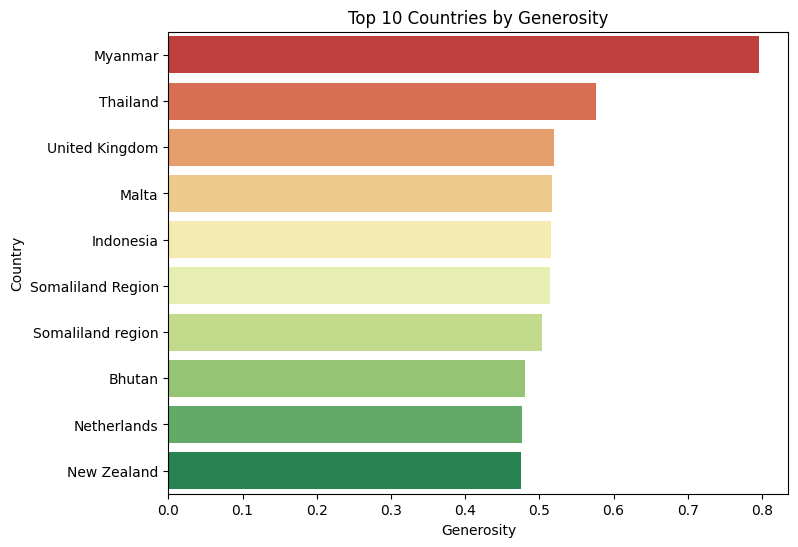

In [39]:
# Create a figure
plt.figure(figsize=(8, 6))

# For 'Generosity' - Get top 10 unique countries
df_unique_countries_generosity = df.drop_duplicates(subset='Country')
top_10_generosity_unique = df_unique_countries_generosity.nlargest(10, 'Generosity')

# Plot for 'Generosity'
sns.barplot(x='Generosity', y='Country', data=top_10_generosity_unique, palette='RdYlGn')

# Set the title for the plot
plt.title('Top 10 Countries by Generosity')

# Display the plot
plt.show()

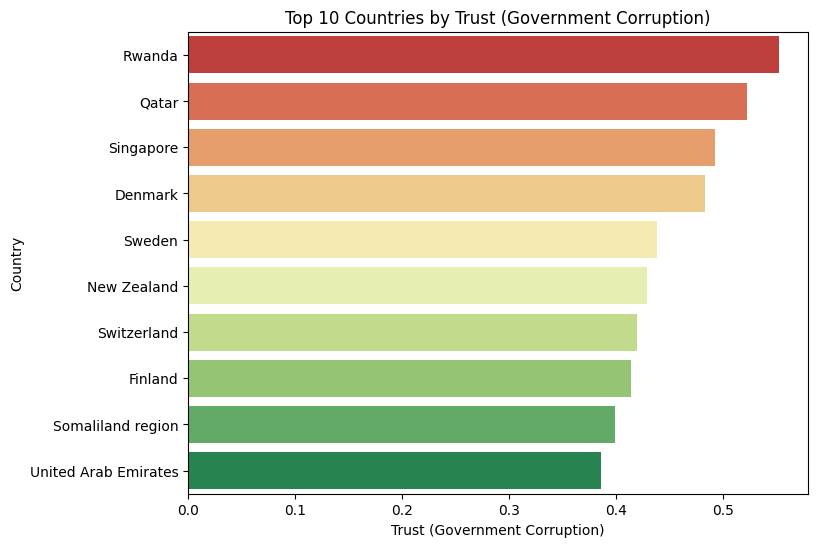

In [40]:
# Create a figure for 'Trust (Government Corruption)'
plt.figure(figsize=(8, 6))

# For 'Trust (Government Corruption)' - Get top 10 unique countries
df_unique_countries_trust = df.drop_duplicates(subset='Country')
top_10_trust_unique = df_unique_countries_trust.nlargest(10, 'Trust (Government Corruption)')

# Plot for 'Trust (Government Corruption)'
sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_10_trust_unique, palette='RdYlGn')

# Set the title for the plot
plt.title('Top 10 Countries by Trust (Government Corruption)')

# Display the plot
plt.show()


In [41]:
d= df[(df['Country'].isin(['India','Canada','United Kingdom', 'United States']))]
d

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
14,United States,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050
20,United Kingdom,21,6.867,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120
116,India,117,4.565,0.644990,0.381740,0.515290,0.397860,0.084920,0.264750
163,Canada,6,7.404,1.440150,1.096100,0.827600,0.573700,0.313290,0.448340
170,United States,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770
180,United Kingdom,23,6.725,1.402830,1.086720,0.809910,0.500360,0.273990,0.501560
275,India,118,4.404,0.740360,0.292470,0.450910,0.402850,0.087220,0.250280
321,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540
328,United States,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579


## STEP 6 : Data Preparation

In [42]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [43]:
df.loc[df['Country']=='India']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
116,India,117,4.565,0.644990,0.381740,0.515290,0.397860,0.084920,0.264750
275,India,118,4.404,0.740360,0.292470,0.450910,0.402850,0.087220,0.250280
436,India,122,4.315,0.792221,0.754373,0.455428,0.469987,0.092227,0.231538
602,India,133,4.190,0.721000,0.747000,0.485000,0.539000,0.093000,0.172000
765,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000


In [44]:
df.loc[df['Country']=='United States']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
14,United States,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050
170,United States,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770
328,United States,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579
487,United States,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000
644,United States,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000


In [45]:
df.loc[df['Country']=='United Kingdom']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
20,United Kingdom,21,6.867,1.266370,1.28548,0.909430,0.59625,0.320670,0.519120
180,United Kingdom,23,6.725,1.402830,1.08672,0.809910,0.50036,0.273990,0.501560
333,United Kingdom,19,6.714,1.441634,1.49646,0.805336,0.50819,0.265428,0.492774
480,United Kingdom,11,7.190,1.244000,1.43300,0.888000,0.46400,0.082000,0.262000
640,United Kingdom,15,7.054,1.333000,1.53800,0.996000,0.45000,0.278000,0.348000


In [46]:
df.loc[df['Country']=='Canada']

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
4,Canada,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.45811
163,Canada,6,7.404,1.440150,1.096100,0.827600,0.573700,0.313290,0.44834
321,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.43554
476,Canada,7,7.328,1.330000,1.532000,0.896000,0.653000,0.291000,0.32100
634,Canada,9,7.278,1.365000,1.505000,1.039000,0.584000,0.308000,0.28500


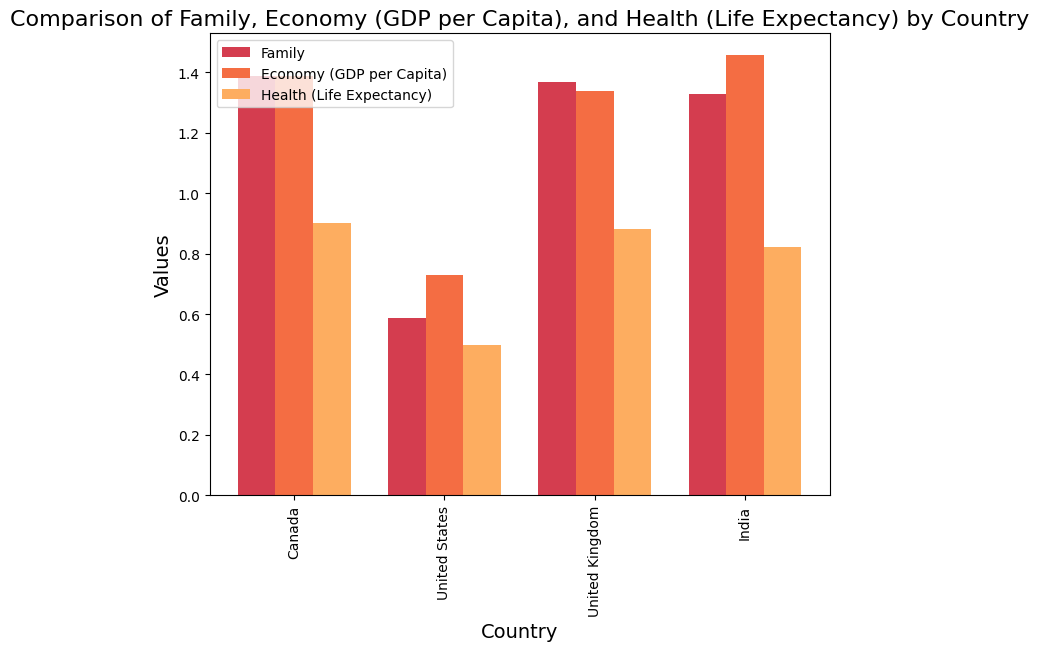

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the number of bars for each country
bar_width = 0.25

# Set the x-axis positions
countries = d['Country'].unique()
x = range(len(countries))

# Generate the 'Spectral' palette with 9 colors
spectral_palette = sns.color_palette('Spectral', n_colors=9)

# Select the red shades from the palette (early part of the spectral palette, red tones)
red_spectral_palette = spectral_palette[:3]  # Red shades from the start

# Create the plots for 'Family', 'Economy (GDP per Capita)', and 'Health (Life Expectancy)' using red Spectral shades
plt.bar(x, d.groupby('Country')['Family'].mean(), width=bar_width, label='Family', color=red_spectral_palette[0], align='center')
plt.bar([i + bar_width for i in x], d.groupby('Country')['Economy (GDP per Capita)'].mean(), width=bar_width, label='Economy (GDP per Capita)', color=red_spectral_palette[1], align='center')
plt.bar([i + 2 * bar_width for i in x], d.groupby('Country')['Health (Life Expectancy)'].mean(), width=bar_width, label='Health (Life Expectancy)', color=red_spectral_palette[2], align='center')

# Labeling the axes and the plot
plt.xlabel('Country', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Comparison of Family, Economy (GDP per Capita), and Health (Life Expectancy) by Country', fontsize=16)
plt.xticks([i + bar_width for i in x], countries, rotation=90)  # Set country labels
plt.legend()

# Show the plot
plt.show()



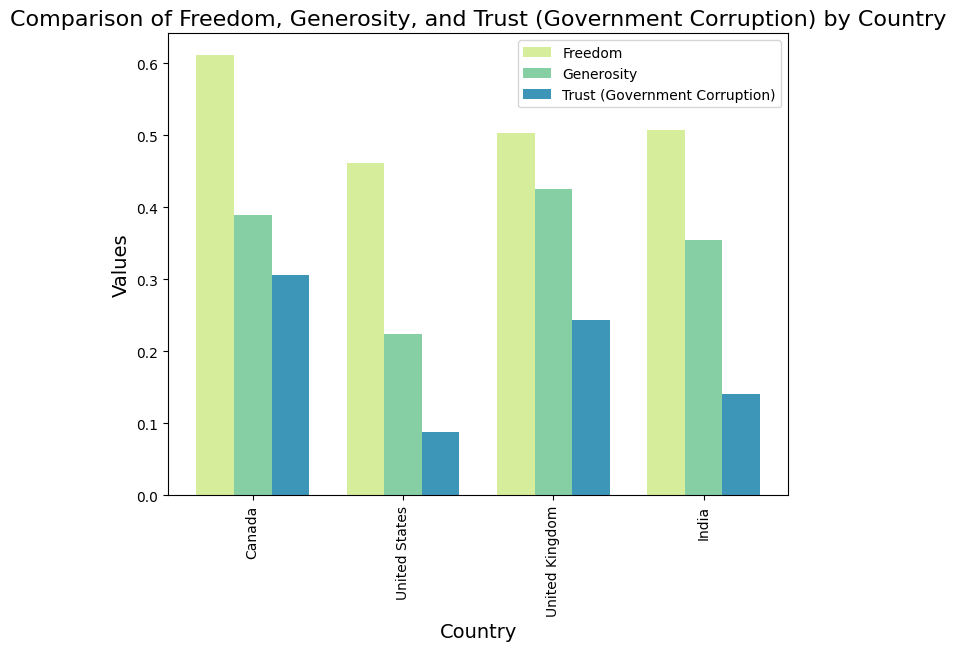

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8,6))

# Set the number of bars for each country
bar_width = 0.25

# Set the x-axis positions
countries = d['Country'].unique()
x = range(len(countries))

# Generate the 'Spectral' palette with 11 colors
spectral_palette = sns.color_palette('Spectral', n_colors=7)

# Extract dark green shades from the middle of the spectral palette (typically from index 4 to 6)
dark_green_spectral_palette = spectral_palette[4:7]  # Picking the darker green range

# Create the plots for 'Freedom', 'Generosity', and 'Trust (Government Corruption)' using the selected dark green shades
plt.bar(x, d.groupby('Country')['Freedom'].mean(), width=bar_width, label='Freedom', color=dark_green_spectral_palette[0], align='center')
plt.bar([i + bar_width for i in x], d.groupby('Country')['Generosity'].mean(), width=bar_width, label='Generosity', color=dark_green_spectral_palette[1], align='center')
plt.bar([i + 2 * bar_width for i in x], d.groupby('Country')['Trust (Government Corruption)'].mean(), width=bar_width, label='Trust (Government Corruption)', color=dark_green_spectral_palette[2], align='center')

# Labeling the axes and the plot
plt.xlabel('Country', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Comparison of Freedom, Generosity, and Trust (Government Corruption) by Country', fontsize=16)
plt.xticks([i + bar_width for i in x], countries, rotation=90)  # Set country labels
plt.legend()

# Show the plot
plt.show()

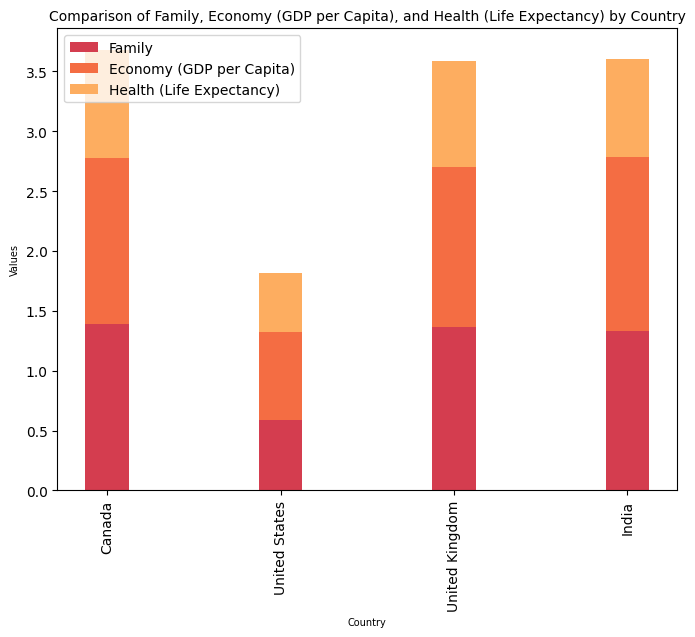

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the number of bars for each country
countries = d['Country'].unique()
x = range(len(countries))

# Generate the 'Spectral' palette with 9 colors
spectral_palette = sns.color_palette('Spectral', n_colors=9)

# Select the red shades from the palette (early part of the spectral palette, red tones)
red_spectral_palette = spectral_palette[:3]  # Red shades from the start

# Compute the values for 'Family', 'Economy (GDP per Capita)', and 'Health (Life Expectancy)'
family_values = d.groupby('Country')['Family'].mean()
economy_values = d.groupby('Country')['Economy (GDP per Capita)'].mean()
health_values = d.groupby('Country')['Health (Life Expectancy)'].mean()

# Create a stacked bar chart
plt.bar(x, family_values, width=0.25, label='Family', color=red_spectral_palette[0], align='center')
plt.bar(x, economy_values, width=0.25, label='Economy (GDP per Capita)', color=red_spectral_palette[1], align='center', bottom=family_values)
plt.bar(x, health_values, width=0.25, label='Health (Life Expectancy)', color=red_spectral_palette[2], align='center', bottom=family_values + economy_values)

# Labeling the axes and the plot
plt.xlabel('Country', fontsize=7)
plt.ylabel('Values', fontsize=7)
plt.title('Comparison of Family, Economy (GDP per Capita), and Health (Life Expectancy) by Country', fontsize=10)
plt.xticks(x, countries, rotation=90)  # Set country labels
plt.legend()

# Show the plot
plt.show()


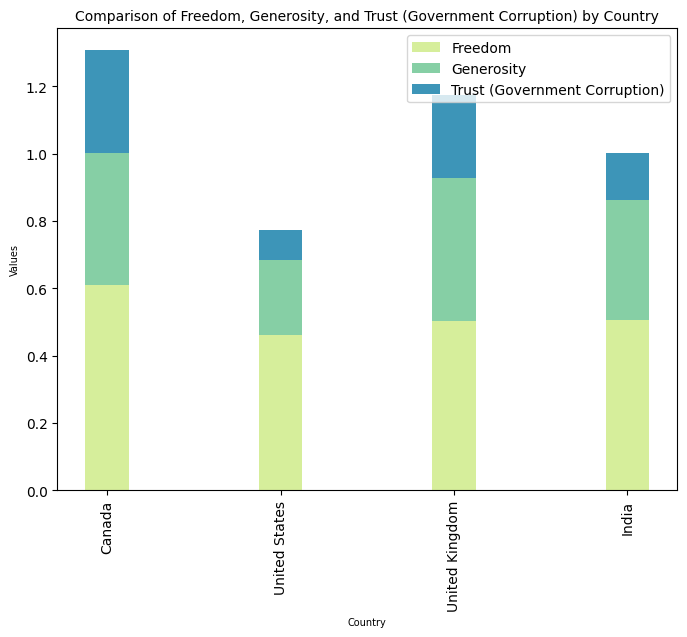

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8,6))

# Set the number of bars for each country
countries = d['Country'].unique()
x = range(len(countries))

# Generate the 'Spectral' palette with 7 colors
spectral_palette = sns.color_palette('Spectral', n_colors=7)

# Extract dark green shades from the middle of the spectral palette (typically from index 4 to 6)
dark_green_spectral_palette = spectral_palette[4:7]  # Picking the darker green range

# Compute the values for 'Freedom', 'Generosity', and 'Trust (Government Corruption)'
freedom_values = d.groupby('Country')['Freedom'].mean()
generosity_values = d.groupby('Country')['Generosity'].mean()
trust_values = d.groupby('Country')['Trust (Government Corruption)'].mean()

# Create a stacked bar chart
plt.bar(x, freedom_values, width=0.25, label='Freedom', color=dark_green_spectral_palette[0], align='center')
plt.bar(x, generosity_values, width=0.25, label='Generosity', color=dark_green_spectral_palette[1], align='center', bottom=freedom_values)
plt.bar(x, trust_values, width=0.25, label='Trust (Government Corruption)', color=dark_green_spectral_palette[2], align='center', bottom=freedom_values + generosity_values)

# Labeling the axes and the plot
plt.xlabel('Country', fontsize=7)
plt.ylabel('Values', fontsize=7)
plt.title('Comparison of Freedom, Generosity, and Trust (Government Corruption) by Country', fontsize=10)
plt.xticks(x, countries, rotation=90)  # Set country labels
plt.legend()

# Show the plot
plt.show()


In [51]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth',
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Happiness Score'],
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

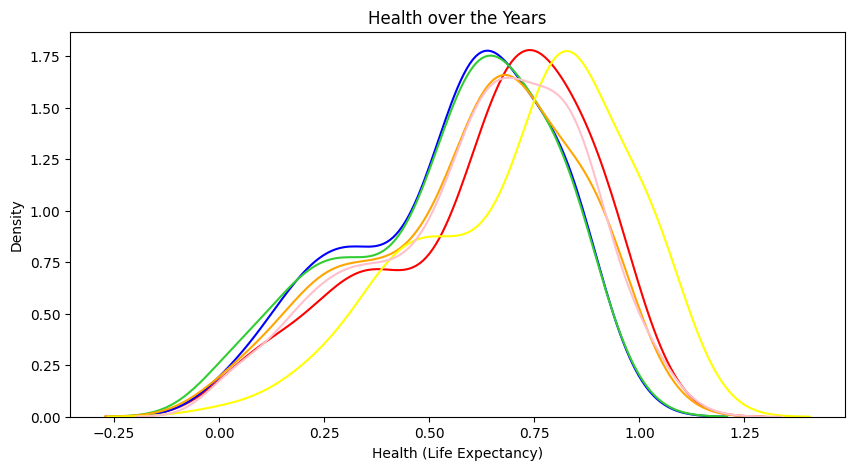

In [59]:
plt.figure(figsize=(10,5))
sns.kdeplot(df1['Health (Life Expectancy)'],color='red')
sns.kdeplot(df2['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df3['Health (Life Expectancy)'],color='limegreen')
sns.kdeplot(df4['Health (Life Expectancy)'],color='orange')
sns.kdeplot(df5['Health (Life Expectancy)'],color='yellow')
sns.kdeplot(df['Health (Life Expectancy)'],color='pink')
plt.title('Health over the Years',size=12)
plt.show()

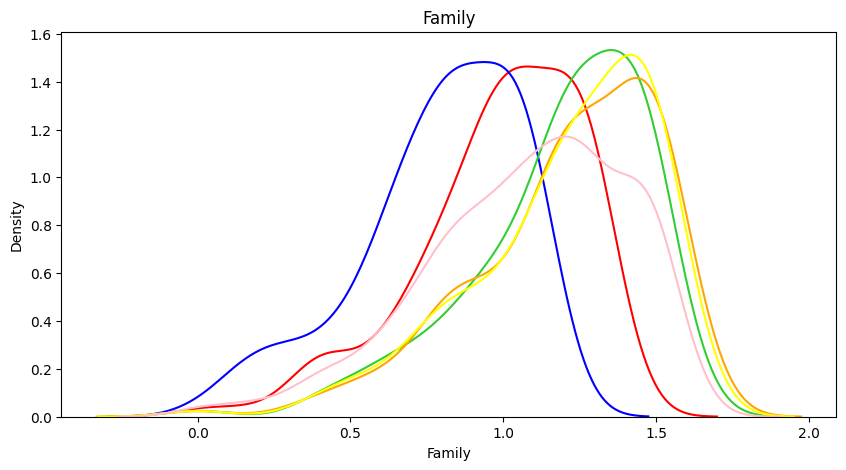

In [58]:
plt.figure(figsize=(10,5))
sns.kdeplot(df1['Family'],color='red')
sns.kdeplot(df2['Family'],color='blue')
sns.kdeplot(df3['Family'],color='limegreen')
sns.kdeplot(df4['Family'],color='orange')
sns.kdeplot(df5['Family'],color='yellow')
sns.kdeplot(df['Family'],color='pink')
plt.title('Family',size=12)
plt.show()

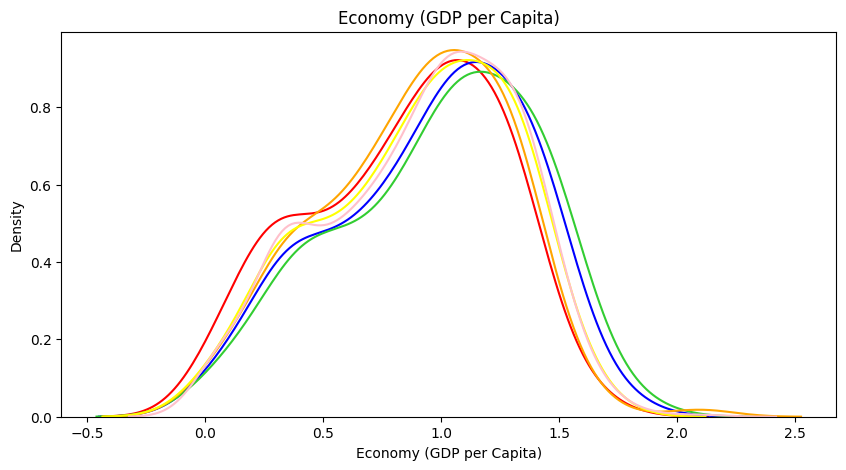

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(df1['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df2['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df3['Economy (GDP per Capita)'],color='limegreen')
sns.kdeplot(df4['Economy (GDP per Capita)'],color='orange')
sns.kdeplot(df5['Economy (GDP per Capita)'],color='yellow')
sns.kdeplot(df['Economy (GDP per Capita)'],color='pink')
plt.title('Economy (GDP per Capita)',size=12)
plt.show()